## Get Tickers from SP500

We will download the current tickers from SP500 and then download the series data realted with those tickers.

In [2]:
# Import packages
import yfinance as yf
import pandas as pd
import json
import pickle


# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(df_tickers.head())
tickers = df_tickers["Symbol"].values

  Symbol     Security             GICS Sector               GICS Sub-Industry   
0    MMM           3M             Industrials        Industrial Conglomerates  \
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                   Biotechnology   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989  


In [13]:
tick_dic = {'sp500':list(tickers)}
with open('../../../datasharing/tickers.json','w') as file:
    json.dump(tick_dic, file)

### Downloading stock data

We will download the data from the last 2 years.

In [2]:
import tqdm, time

In [4]:
time_download = "max"

df_hst_tickers = {}
exc_tickers = []

def append_tickers(tickers, df_hst_tickers, exc_tickers):
    """
    Create a dictionary that contains the dataframes
    """
    for idx,ticker in tqdm.tqdm(enumerate(tickers)):
        print(idx)
        if idx % 20 == 0:
            time.sleep(10)
        try:
            stock = yf.Ticker(ticker)
            hist = stock.history(period=time_download)
            df_hst_tickers[ticker] = hist
        except Exception as e:
            print('Exception raised for ticker')
            exc_tickers.append(ticker)
            
    return df_hst_tickers, exc_tickers

In [5]:
df_hst_tickers, exc_tickers = append_tickers(tickers, df_hst_tickers, exc_tickers)

0it [00:00, ?it/s]

0


1it [00:10, 10.55s/it]

1


2it [00:10,  4.55s/it]

2


4it [00:11,  1.66s/it]

3
4


5it [00:11,  1.15s/it]

5


6it [00:12,  1.13it/s]

6


7it [00:12,  1.45it/s]

7


8it [00:12,  1.78it/s]

8


9it [00:12,  1.99it/s]

9


10it [00:13,  2.32it/s]

10


12it [00:13,  3.05it/s]

11
12


13it [00:13,  3.36it/s]

13


14it [00:14,  3.35it/s]

14


15it [00:14,  3.29it/s]

15


16it [00:14,  3.60it/s]

16


17it [00:15,  3.90it/s]

17


18it [00:15,  3.35it/s]

18


19it [00:15,  3.31it/s]

19


20it [00:15,  3.59it/s]

20


21it [00:26,  3.29s/it]

21


22it [00:26,  2.47s/it]

22


23it [00:27,  1.81s/it]

23


24it [00:27,  1.33s/it]

24


25it [00:27,  1.02s/it]

25


26it [00:27,  1.28it/s]

26


27it [00:28,  1.45it/s]

27


28it [00:28,  1.64it/s]

28


29it [00:29,  1.84it/s]

29


30it [00:29,  2.20it/s]

30


31it [00:29,  2.64it/s]

31


32it [00:29,  2.98it/s]

32


33it [00:30,  2.75it/s]

33


34it [00:30,  2.93it/s]

34


35it [00:30,  3.07it/s]

35


36it [00:31,  2.99it/s]

36


37it [00:31,  3.35it/s]

37


38it [00:31,  3.17it/s]

38


39it [00:32,  2.98it/s]

39


40it [00:32,  2.97it/s]

40


41it [00:42,  3.35s/it]

41


42it [00:43,  2.41s/it]

42


43it [00:43,  1.75s/it]

43


45it [00:43,  1.00it/s]

44
45


46it [00:44,  1.25it/s]

46


47it [00:44,  1.58it/s]

47


48it [00:44,  1.84it/s]

48


49it [00:45,  2.06it/s]

49


50it [00:45,  2.33it/s]

50


51it [00:45,  2.42it/s]

51


52it [00:46,  2.68it/s]

52


53it [00:46,  2.90it/s]

53


54it [00:46,  2.79it/s]

54


55it [00:46,  3.15it/s]

55


56it [00:47,  3.08it/s]

56


57it [00:47,  2.76it/s]

57


58it [00:48,  2.65it/s]

58


59it [00:48,  2.65it/s]

59


60it [00:48,  2.66it/s]

60


61it [00:59,  3.38s/it]

61


62it [00:59,  2.51s/it]BRK.B: No timezone found, symbol may be delisted


62
63


64it [01:00,  1.44s/it]

64


65it [01:00,  1.16s/it]

65


66it [01:00,  1.08it/s]

66


67it [01:01,  1.35it/s]

67


68it [01:01,  1.66it/s]

68


69it [01:01,  2.04it/s]

69


71it [01:02,  2.51it/s]

70
71


72it [01:02,  2.72it/s]

72


73it [01:02,  2.94it/s]

73


74it [01:02,  3.10it/s]

74


76it [01:03,  3.33it/s]

75
76


77it [01:03,  3.55it/s]

77


78it [01:04,  3.15it/s]BF.B: No price data found, symbol may be delisted (1d 1925-01-10 -> 2023-12-18)


78
79


80it [01:04,  4.26it/s]

80


81it [01:14,  2.71s/it]

81


83it [01:15,  1.55s/it]

82
83


84it [01:15,  1.19s/it]

84


85it [01:15,  1.03it/s]

85


86it [01:16,  1.30it/s]

86


87it [01:16,  1.54it/s]

87


88it [01:16,  1.91it/s]

88


90it [01:17,  2.71it/s]

89
90


91it [01:17,  3.23it/s]

91


92it [01:17,  2.73it/s]

92


93it [01:18,  3.14it/s]

93


95it [01:18,  3.90it/s]

94
95


96it [01:18,  3.93it/s]

96


97it [01:18,  3.85it/s]

97


98it [01:19,  4.12it/s]

98


100it [01:19,  3.79it/s]

99
100


101it [01:30,  3.28s/it]

101


103it [01:30,  1.72s/it]

102
103


105it [01:31,  1.04it/s]

104
105


106it [01:31,  1.20it/s]

106


107it [01:31,  1.55it/s]

107


108it [01:32,  1.83it/s]

108


109it [01:32,  2.05it/s]

109


110it [01:32,  2.26it/s]

110


111it [01:33,  2.46it/s]

111


112it [01:33,  2.51it/s]

112


113it [01:33,  2.74it/s]

113


115it [01:34,  3.20it/s]

114
115


116it [01:34,  2.98it/s]

116


117it [01:34,  3.22it/s]

117


118it [01:35,  3.02it/s]

118


119it [01:35,  2.61it/s]

119


120it [01:36,  2.90it/s]

120


121it [01:46,  3.38s/it]

121


122it [01:47,  2.49s/it]

122


123it [01:47,  1.84s/it]

123


124it [01:47,  1.39s/it]

124


125it [01:48,  1.09s/it]

125


126it [01:48,  1.11it/s]

126


128it [01:48,  1.86it/s]

127
128


129it [01:49,  2.06it/s]

129


130it [01:49,  2.40it/s]

130


132it [01:50,  3.01it/s]

131
132


133it [01:50,  3.13it/s]

133


134it [01:50,  3.22it/s]

134


135it [01:50,  3.38it/s]

135


136it [01:51,  3.61it/s]

136


137it [01:51,  3.30it/s]

137


138it [01:51,  3.12it/s]

138


139it [01:52,  2.98it/s]

139


140it [01:52,  2.85it/s]

140


141it [02:02,  3.34s/it]

141


142it [02:03,  2.40s/it]

142


144it [02:03,  1.32s/it]

143
144


145it [02:04,  1.03s/it]

145


146it [02:04,  1.23it/s]

146


148it [02:04,  2.00it/s]

147
148


149it [02:05,  2.37it/s]

149


150it [02:05,  2.75it/s]

150


151it [02:05,  3.13it/s]

151


152it [02:05,  3.33it/s]

152


153it [02:06,  3.17it/s]

153


154it [02:06,  3.48it/s]

154


156it [02:06,  3.85it/s]

155
156


157it [02:07,  3.61it/s]

157


158it [02:07,  2.98it/s]

158


159it [02:07,  2.92it/s]

159


160it [02:08,  2.69it/s]

160


161it [02:18,  3.35s/it]

161


162it [02:19,  2.49s/it]

162


163it [02:19,  1.81s/it]

163


164it [02:19,  1.37s/it]

164


165it [02:20,  1.09s/it]

165


166it [02:20,  1.21it/s]

166


167it [02:20,  1.50it/s]

167


168it [02:20,  1.85it/s]

168


169it [02:21,  1.94it/s]

169


171it [02:22,  2.54it/s]

170
171


172it [02:22,  2.57it/s]

172


174it [02:22,  3.10it/s]

173
174


175it [02:23,  2.89it/s]

175


176it [02:23,  2.96it/s]

176


177it [02:23,  3.26it/s]

177


178it [02:24,  3.21it/s]

178


179it [02:24,  3.21it/s]

179


180it [02:24,  3.29it/s]

180


181it [02:35,  3.28s/it]

181


182it [02:35,  2.38s/it]

182


183it [02:35,  1.80s/it]

183


184it [02:36,  1.37s/it]

184


185it [02:36,  1.09s/it]

185


186it [02:36,  1.20it/s]

186


187it [02:37,  1.46it/s]

187


188it [02:37,  1.80it/s]

188


189it [02:37,  1.89it/s]

189


190it [02:38,  2.31it/s]

190


191it [02:38,  2.63it/s]

191


192it [02:38,  2.78it/s]

192


193it [02:39,  2.81it/s]

193


194it [02:39,  2.63it/s]

194


195it [02:39,  2.77it/s]

195


196it [02:40,  3.05it/s]

196


198it [02:40,  3.37it/s]

197
198


199it [02:40,  3.41it/s]

199


200it [02:41,  3.58it/s]

200


201it [02:51,  3.25s/it]

201


202it [02:51,  2.38s/it]

202


204it [02:52,  1.31s/it]

203
204


206it [02:52,  1.38it/s]

205
206


207it [02:52,  1.80it/s]

207


208it [02:53,  1.94it/s]

208


209it [02:53,  2.18it/s]

209


210it [02:53,  2.57it/s]

210


212it [02:54,  3.50it/s]

211
212


213it [02:54,  3.48it/s]

213


214it [02:54,  3.82it/s]

214


215it [02:55,  3.06it/s]

215


216it [02:55,  2.61it/s]

216


218it [02:56,  3.14it/s]

217
218


219it [02:56,  2.93it/s]

219


220it [02:56,  3.10it/s]

220


221it [03:07,  3.31s/it]

221


222it [03:07,  2.45s/it]

222


223it [03:07,  1.79s/it]

223


224it [03:08,  1.38s/it]

224


225it [03:08,  1.05s/it]

225


227it [03:09,  1.55it/s]

226
227


228it [03:09,  1.81it/s]

228


229it [03:09,  2.17it/s]

229


230it [03:09,  2.36it/s]

230


232it [03:10,  3.00it/s]

231
232


233it [03:10,  3.39it/s]

233


234it [03:10,  3.47it/s]

234


235it [03:11,  3.06it/s]

235


236it [03:11,  2.58it/s]

236


237it [03:12,  2.74it/s]

237


239it [03:12,  3.11it/s]

238
239


240it [03:13,  2.58it/s]

240


241it [03:23,  3.40s/it]

241


242it [03:24,  2.48s/it]

242


244it [03:24,  1.36s/it]

243
244


245it [03:25,  1.11s/it]

245


246it [03:25,  1.15it/s]

246


247it [03:25,  1.47it/s]

247


248it [03:26,  1.65it/s]

248


249it [03:26,  2.03it/s]

249


251it [03:26,  2.91it/s]

250
251


252it [03:27,  3.29it/s]

252


253it [03:27,  3.03it/s]

253


254it [03:27,  3.34it/s]

254


255it [03:28,  2.97it/s]

255


256it [03:28,  2.49it/s]

256


257it [03:29,  2.58it/s]

257


258it [03:29,  2.84it/s]

258


259it [03:29,  3.19it/s]

259


260it [03:29,  3.29it/s]

260


262it [03:40,  2.36s/it]

261
262


263it [03:40,  1.75s/it]

263


264it [03:40,  1.33s/it]

264


265it [03:41,  1.01s/it]

265


266it [03:41,  1.25it/s]

266


267it [03:41,  1.53it/s]

267


268it [03:42,  1.64it/s]

268


269it [03:42,  1.92it/s]

269


270it [03:42,  2.13it/s]

270


271it [03:43,  2.39it/s]

271


273it [03:43,  3.17it/s]

272
273


274it [03:43,  3.54it/s]

274


276it [03:44,  3.71it/s]

275
276


277it [03:44,  3.14it/s]

277


279it [03:45,  3.61it/s]

278
279


280it [03:45,  3.03it/s]

280


281it [03:56,  3.30s/it]

281


282it [03:56,  2.46s/it]

282


283it [03:56,  1.83s/it]

283


284it [03:57,  1.36s/it]

284


285it [03:57,  1.04s/it]

285


286it [03:57,  1.26it/s]

286


287it [03:57,  1.62it/s]

287


288it [03:58,  1.97it/s]

288


289it [03:58,  2.11it/s]

289


291it [03:59,  2.84it/s]

290
291


292it [03:59,  3.12it/s]

292


293it [03:59,  2.90it/s]

293


294it [04:00,  2.57it/s]

294


295it [04:00,  2.58it/s]

295


296it [04:00,  2.99it/s]

296


297it [04:01,  3.35it/s]

297


298it [04:01,  3.21it/s]

298


299it [04:01,  2.79it/s]

299


300it [04:02,  3.16it/s]

300


301it [04:12,  3.30s/it]

301


302it [04:12,  2.40s/it]

302


303it [04:13,  1.79s/it]

303


304it [04:13,  1.34s/it]

304


305it [04:13,  1.05s/it]

305


306it [04:13,  1.24it/s]

306


307it [04:14,  1.56it/s]

307


308it [04:14,  1.74it/s]

308


309it [04:15,  1.87it/s]

309


310it [04:15,  2.11it/s]

310


311it [04:15,  2.19it/s]

311


313it [04:16,  2.63it/s]

312
313


314it [04:16,  2.78it/s]

314


315it [04:16,  3.16it/s]

315


316it [04:17,  3.27it/s]

316


317it [04:17,  3.38it/s]

317


318it [04:17,  3.22it/s]

318


319it [04:18,  3.24it/s]

319


320it [04:18,  3.44it/s]

320


321it [04:28,  3.25s/it]

321


322it [04:28,  2.35s/it]

322


323it [04:29,  1.71s/it]

323


324it [04:29,  1.34s/it]

324


326it [04:29,  1.30it/s]

325
326


327it [04:30,  1.62it/s]

327


328it [04:30,  1.92it/s]

328


329it [04:30,  2.25it/s]

329


330it [04:31,  2.46it/s]

330


331it [04:31,  2.28it/s]

331


332it [04:31,  2.69it/s]

332


333it [04:32,  2.82it/s]

333


334it [04:32,  2.99it/s]

334


335it [04:32,  3.31it/s]

335


337it [04:33,  3.54it/s]

336
337


338it [04:33,  4.00it/s]

338


339it [04:33,  3.44it/s]

339


340it [04:34,  3.31it/s]

340


341it [04:44,  3.35s/it]

341


342it [04:44,  2.45s/it]

342


343it [04:45,  1.81s/it]

343


344it [04:45,  1.37s/it]

344


346it [04:46,  1.23it/s]

345
346


347it [04:46,  1.56it/s]

347


348it [04:46,  1.74it/s]

348


349it [04:47,  2.00it/s]

349


350it [04:47,  2.34it/s]

350


351it [04:47,  2.76it/s]

351


352it [04:47,  3.08it/s]

352


353it [04:48,  2.84it/s]

353


354it [04:48,  3.06it/s]

354


355it [04:49,  2.80it/s]

355


356it [04:49,  3.21it/s]

356


357it [04:49,  2.98it/s]

357


359it [04:50,  3.55it/s]

358
359


360it [04:50,  3.14it/s]

360


362it [05:00,  2.37s/it]

361
362


363it [05:01,  1.74s/it]

363


364it [05:01,  1.33s/it]

364


366it [05:02,  1.29it/s]

365
366


367it [05:02,  1.69it/s]

367


368it [05:02,  1.83it/s]

368


369it [05:03,  1.90it/s]

369


370it [05:03,  1.92it/s]

370


371it [05:04,  2.02it/s]

371


373it [05:04,  2.87it/s]

372
373


374it [05:04,  2.82it/s]

374


375it [05:05,  3.05it/s]

375


376it [05:05,  2.80it/s]

376


377it [05:05,  2.87it/s]

377


378it [05:06,  2.74it/s]

378


379it [05:06,  2.68it/s]

379


380it [05:07,  2.87it/s]

380


381it [05:17,  3.40s/it]

381


382it [05:17,  2.49s/it]

382


383it [05:18,  1.82s/it]

383


384it [05:18,  1.36s/it]

384


385it [05:18,  1.06s/it]

385


386it [05:19,  1.23it/s]

386


387it [05:19,  1.47it/s]

387


389it [05:20,  2.15it/s]

388
389


390it [05:20,  2.50it/s]

390


391it [05:20,  2.74it/s]

391


392it [05:20,  3.00it/s]

392


393it [05:21,  3.25it/s]

393


394it [05:21,  3.08it/s]

394


395it [05:21,  2.52it/s]

395


396it [05:22,  2.74it/s]

396


397it [05:22,  2.97it/s]

397


398it [05:22,  3.34it/s]

398


399it [05:23,  3.10it/s]

399


400it [05:23,  3.10it/s]

400


401it [05:33,  3.31s/it]

401


402it [05:34,  2.43s/it]

402


403it [05:34,  1.80s/it]

403


404it [05:34,  1.37s/it]

404


405it [05:35,  1.07s/it]

405


406it [05:35,  1.20it/s]

406


407it [05:35,  1.47it/s]

407


408it [05:36,  1.79it/s]

408


409it [05:36,  1.98it/s]

409


410it [05:36,  2.40it/s]

410


411it [05:36,  2.71it/s]

411


412it [05:37,  2.79it/s]

412


413it [05:37,  2.97it/s]

413


415it [05:38,  3.51it/s]

414
415


416it [05:38,  3.22it/s]

416


417it [05:38,  3.36it/s]

417


418it [05:38,  3.35it/s]

418


419it [05:39,  3.49it/s]

419


420it [05:39,  3.25it/s]

420


421it [05:49,  3.33s/it]

421


422it [05:50,  2.44s/it]

422


423it [05:50,  1.82s/it]

423


424it [05:50,  1.36s/it]

424


425it [05:51,  1.07s/it]

425


426it [05:51,  1.21it/s]

426


427it [05:51,  1.51it/s]

427


429it [05:52,  2.20it/s]

428
429


430it [05:52,  2.48it/s]

430


431it [05:53,  2.54it/s]

431


432it [05:53,  2.92it/s]

432


433it [05:53,  2.83it/s]

433


434it [05:53,  3.14it/s]

434


435it [05:54,  3.27it/s]

435


436it [05:54,  3.59it/s]

436


437it [05:54,  3.19it/s]

437


438it [05:55,  3.48it/s]

438


439it [05:55,  3.57it/s]

439


440it [05:55,  3.26it/s]

440


442it [06:06,  2.37s/it]

441
442


443it [06:06,  1.79s/it]

443


444it [06:06,  1.36s/it]

444


445it [06:07,  1.05s/it]

445


446it [06:07,  1.20it/s]

446


447it [06:07,  1.48it/s]

447


448it [06:08,  1.74it/s]

448


449it [06:08,  2.15it/s]

449


450it [06:08,  2.32it/s]

450


451it [06:09,  2.68it/s]

451


452it [06:09,  2.67it/s]

452


453it [06:09,  2.81it/s]

453


454it [06:10,  2.85it/s]

454


456it [06:10,  3.37it/s]

455
456


458it [06:11,  3.71it/s]

457
458


460it [06:11,  3.67it/s]

459
460


461it [06:22,  3.27s/it]

461


462it [06:22,  2.37s/it]

462


463it [06:22,  1.75s/it]

463


464it [06:22,  1.33s/it]

464


465it [06:23,  1.04s/it]

465


467it [06:23,  1.65it/s]

466
467


468it [06:23,  2.04it/s]

468


469it [06:24,  2.45it/s]

469


470it [06:24,  2.41it/s]

470


471it [06:24,  2.72it/s]

471


472it [06:25,  2.72it/s]

472


474it [06:25,  3.23it/s]

473
474


475it [06:26,  3.46it/s]

475


476it [06:26,  3.05it/s]

476


477it [06:26,  2.72it/s]

477


478it [06:27,  2.87it/s]

478


479it [06:27,  2.78it/s]

479


480it [06:27,  2.72it/s]

480


482it [06:38,  2.45s/it]

481
482


483it [06:38,  1.80s/it]

483


484it [06:39,  1.33s/it]

484


485it [06:39,  1.15s/it]

485


486it [06:40,  1.09it/s]

486


487it [06:40,  1.35it/s]

487


488it [06:40,  1.62it/s]

488


490it [06:41,  2.35it/s]

489
490


491it [06:41,  2.42it/s]

491


492it [06:42,  2.50it/s]

492


493it [06:42,  2.51it/s]

493


494it [06:42,  2.76it/s]

494


495it [06:43,  2.75it/s]

495


496it [06:43,  3.14it/s]

496


498it [06:44,  3.25it/s]

497
498


499it [06:44,  3.34it/s]

499


500it [06:44,  3.49it/s]

500


501it [06:54,  3.29s/it]

501


503it [06:55,  1.21it/s]

502


## Saving downloaded stock data

The following line saves the downloaded data as a pickle file. This is done in order to avoid redownloading all the data again. If you want to save the data, the uncomment it.

In [6]:
len(df_hst_tickers.keys())

503

In [7]:
with open('../datasharing/hist_stock_data.pkl','wb') as file:
    pickle.dump(df_hst_tickers, file)

## Loading downloaded stock data

The following line load the pickle file that contains the downloaded data. We will then create a single dataframe.

In [21]:
# Load the pickle file that contains the full data for each stock
with open('../../../datasharing/hist_stock_data.pkl','rb') as file:
    df_hst_tickers = pickle.load(file)

In [22]:
# Chose the label "Close" as the main label to analyse the price series
label = 'Close'
df_close_stocks = pd.DataFrame([])
for key, df in df_hst_tickers.items():
    df_close_stocks = pd.concat([df_close_stocks, df[label]], axis = 1)

In [23]:
# Create a single data frame that cotains the series data from all the SP500 stocks
df_close_stocks.columns = list(df_hst_tickers.keys())
df_close_stocks['date'] = df_close_stocks.index
df_close_stocks.index = pd.to_datetime(df_close_stocks['date'])

/tmp/ipykernel_1161031/2935541711.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_close_stocks['date'] = df_close_stocks.index


In [24]:
df_close_stocks

MMM        AOS         ABT        ABBV   
date                                                                       
1962-01-02 00:00:00-05:00    0.702820        NaN         NaN         NaN  \
1962-01-03 00:00:00-05:00    0.708104        NaN         NaN         NaN   
1962-01-04 00:00:00-05:00    0.708104        NaN         NaN         NaN   
1962-01-05 00:00:00-05:00    0.689609        NaN         NaN         NaN   
1962-01-08 00:00:00-05:00    0.685646        NaN         NaN         NaN   
...                               ...        ...         ...         ...   
2023-12-11 00:00:00-05:00  103.160004  78.040001  106.220001  151.240005   
2023-12-12 00:00:00-05:00  102.559998  79.480003  106.680000  153.240005   
2023-12-13 00:00:00-05:00  104.190002  79.529999  107.250000  154.300003   
2023-12-14 00:00:00-05:00  107.040001  80.589996  108.599998  154.880005   
2023-12-15 00:00:00-05:00  106.980003  79.199997  107.290001  154.039993   

                                  ACN        ADBE         AMD        AES   
date                                                                       
1962-01-02 00:00:00-05:00         NaN         NaN         NaN        NaN  \
1962-01-03 00:00:00-05:00         NaN         NaN         NaN        NaN   
1962-01-04 00:00:00-05:00         NaN         NaN         NaN        NaN   
1962-01-05 00:00:00-05:00         NaN         NaN         NaN        NaN   
1962-01-08 00:00:00-05:00         NaN         NaN         NaN        NaN   
...                               ...         ...         ...        ...   
2023-12-11 00:00:00-05:00  342.309998  625.200012  134.410004  18.049999   
2023-12-12 00:00:00-05:00  343.220001  633.659973  137.610001  18.209999   
2023-12-13 00:00:00-05:00  343.640015  624.260010  138.190002  19.330000   
2023-12-14 00:00:00-05:00  342.730011  584.640015  138.000000  19.629999   
2023-12-15 00:00:00-05:00  344.149994  584.679993  139.149994  19.350000   

                                 AFL           A  ...         GWW       WYNN   
date                                              ...                          
1962-01-02 00:00:00-05:00        NaN         NaN  ...         NaN        NaN  \
1962-01-03 00:00:00-05:00        NaN         NaN  ...         NaN        NaN   
1962-01-04 00:00:00-05:00        NaN         NaN  ...         NaN        NaN   
1962-01-05 00:00:00-05:00        NaN         NaN  ...         NaN        NaN   
1962-01-08 00:00:00-05:00        NaN         NaN  ...         NaN        NaN   
...                              ...         ...  ...         ...        ...   
2023-12-11 00:00:00-05:00  83.110001  128.970001  ...  817.440002  86.000000   
2023-12-12 00:00:00-05:00  84.349998  128.789993  ...  821.070007  86.230003   
2023-12-13 00:00:00-05:00  84.029999  133.740005  ...  818.809998  88.019997   
2023-12-14 00:00:00-05:00  81.279999  137.960007  ...  828.809998  89.800003   
2023-12-15 00:00:00-05:00  80.570000  136.779999  ...  823.539978  88.760002   

                                 XEL         XYL         YUM        ZBRA   
date                                                                       
1962-01-02 00:00:00-05:00        NaN         NaN         NaN         NaN  \
1962-01-03 00:00:00-05:00        NaN         NaN         NaN         NaN   
1962-01-04 00:00:00-05:00        NaN         NaN         NaN         NaN   
1962-01-05 00:00:00-05:00        NaN         NaN         NaN         NaN   
1962-01-08 00:00:00-05:00        NaN         NaN         NaN         NaN   
...                              ...         ...         ...         ...   
2023-12-11 00:00:00-05:00  61.549999  107.699997  126.629997  239.649994   
2023-12-12 00:00:00-05:00  61.160000  107.940002  128.070007  239.380005   
2023-12-13 00:00:00-05:00  63.330002  109.180000  130.929993  244.429993   
2023-12-14 00:00:00-05:00  62.570000  110.930000  131.110001  272.160004   
2023-12-15 00:00:00-05:00  61.580002  110.720001  128.639999  270.179993   

                          

### Getting statistics from all the stocks

We define a function that computes the mean return, and the mean sharpe ratio of the stock series.
We can define the frequency of how we want to compute those statistics (yearly, monthly, weekly, ...)


In [25]:
# Creating the function that compute the statistics

def get_stats(df_close_stocks, tickers, years = None, inter = None, freq = 'M', min_els = 6):
    """
    This function produces some statistics using a dataframe fille with stocks.
    Precisely the average mean return and the sharpe ratio.
    Args:
        df_hst_tickers (dict) - contains dataframes for multiple stocks
        tickers (list) - the list of tickers to compute the statistics 
        years (list) - the list of years to compute the statistics
        inter (slice) - A slice that precises the data indexs to compute the statistics
        freq (str) - the frequency for the statistics (Y,M,W,2W, ...)
        min_els(int) - the minimum quantity of elements in the series required
            after the frequency postprocessing.
    """
    st_stats = {}
    for ticker in tickers:
        if years:
            tmp_df = df_close_stocks[df_close_stocks['date'].dt.year.isin(years)]
        elif inter:
            tmp_df = df_close_stocks.iloc[inter]

        pc_m = tmp_df[ticker].pct_change(periods = 1, freq = freq).dropna()

        # discart ticket if not enough data
        if pc_m.shape[0] < min_els:
            continue
            
        av_ret = pc_m.mean()
        sr = av_ret / pc_m.std()
        st_stats[ticker] = {"sr":sr, 'av_ret':av_ret}
            
    return st_stats

def df_and_sort(st_stats, col):
    """
    Function that creates a dataframe using a dictionary with of stocks with statistics
    metrics and sort the dataframe based on the column name precised.
    Args:
        st_stats (dict) - The dictionary containing the statistics.
        col (str) - The name of the column for sorting.
    """
    df_stats = pd.DataFrame(st_stats).transpose()
    df_stats.sort_values(by=col, inplace = True, ascending = False)
    return df_stats

In [26]:
years_tr = list(range(2003,2014))
years_tst = list(range(2014,2024))

In [27]:
metric = 'sr' # choose between 'av_ret' or 'sr'
stats_tr = get_stats(df_close_stocks, tickers, years = years_tr)
stats_tst = get_stats(df_close_stocks, tickers, years = years_tst)
df_stats_tr = df_and_sort(stats_tr, metric)
df_stats_tst = df_and_sort(stats_tst, metric)

We can observe the mean and the sharpe ratio for those subset of train stocks to be the following values:

In [28]:
stats_tr

{'MMM': {'sr': 0.28654688945504986, 'av_ret': 0.016507222599083295},
 'AOS': {'sr': 0.24754369768391185, 'av_ret': 0.02350565324006411},
 'ABT': {'sr': 0.16426646063274475, 'av_ret': 0.007984124991086887},
 'ABBV': {'sr': 0.8176999787772858, 'av_ret': 0.057303852001482185},
 'ACN': {'sr': 0.2905031648603829, 'av_ret': 0.017408688996153925},
 'ADBE': {'sr': 0.16123455649427468, 'av_ret': 0.01562311719581781},
 'AMD': {'sr': 0.040212064330201074, 'av_ret': 0.007496708949827433},
 'AES': {'sr': 0.1920067925430727, 'av_ret': 0.02127225448568428},
 'AFL': {'sr': 0.18469989295177514, 'av_ret': 0.016618073869953235},
 'A': {'sr': 0.15173584974178758, 'av_ret': 0.015243855631629845},
 'APD': {'sr': 0.28351870577679594, 'av_ret': 0.01960683054368758},
 'AKAM': {'sr': 0.1808002199334386, 'av_ret': 0.03341051170638364},
 'ALB': {'sr': 0.21444143764625945, 'av_ret': 0.02061407490235346},
 'ARE': {'sr': 0.1884606286611548, 'av_ret': 0.022253398311663206},
 'ALGN': {'sr': 0.1698702525374382, 'av_ret

<AxesSubplot: >

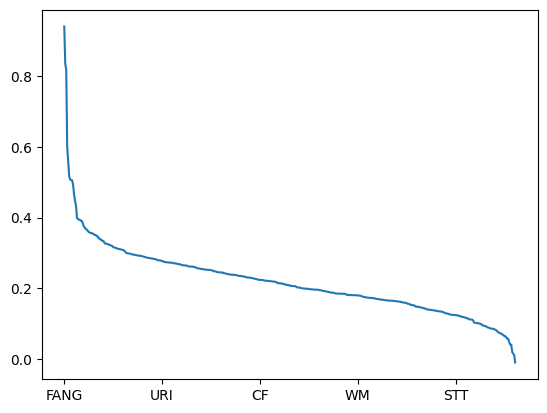

In [29]:
df_stats_tr['sr'].plot()

<AxesSubplot: >

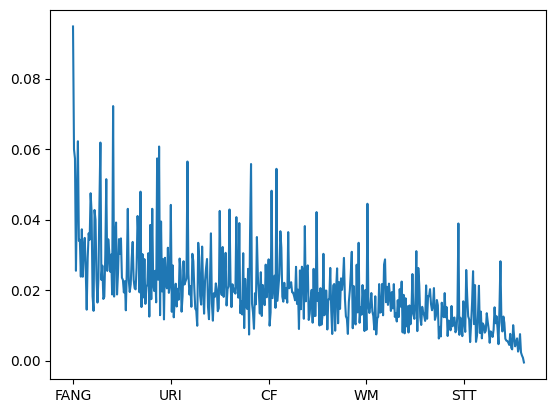

In [30]:
df_stats_tr['av_ret'].plot()

### Creating stock of baskets

We create a basket of stocks using the following parameters. We choose among the best N stocks (sorted by your choosen column).

In [31]:
max_stocks = 100
basket_size = 5

Using this group of stocks, we can check how they performed the following year.
We then save the results for using them for another notebook.

In [32]:
df_stats_tr[0:max_stocks].mean()

sr        0.354306
av_ret    0.030217
dtype: float64

In [33]:
lst_vals = range(0,max_stocks)

<AxesSubplot: >

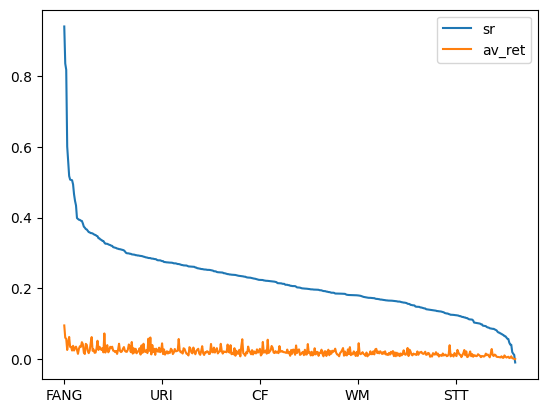

In [34]:
df_stats_tr.plot()

In [35]:
tst = df_stats_tr.index[lst_vals].values
df_stats_tst.loc[tst].dropna().mean()

sr        0.144862
av_ret    0.011369
dtype: float64

In [36]:
tst

array(['FANG', 'APTV', 'ABBV', 'AMCR', 'PSX', 'GNRC', 'TRGP', 'NCLH',
       'VRSK', 'FLT', 'AWK', 'CHTR', 'TYL', 'SHW', 'ZTS', 'GILD', 'AVGO',
       'LKQ', 'FTNT', 'MA', 'CHD', 'WEC', 'TRMB', 'NOW', 'NKE', 'ACGL',
       'AON', 'LYB', 'NXPI', 'UNP', 'AMT', 'EVRG', 'SRE', 'FAST', 'SBAC',
       'OKE', 'HCA', 'EXR', 'ORLY', 'ANSS', 'LIN', 'TSLA', 'WRB', 'ROK',
       'ICE', 'CB', 'PNR', 'AAPL', 'NDSN', 'ODFL', 'PSA', 'AME', 'DVA',
       'O', 'NEE', 'IDXX', 'MNST', 'NSC', 'ROL', 'CSX', 'DLR', 'CCI',
       'HAS', 'PPG', 'GWW', 'JBHT', 'CRM', 'CTRA', 'JKHY', 'WYNN', 'ECL',
       'TSCO', 'ROP', 'WAB', 'RTX', 'ROST', 'HUBB', 'WMB', 'XEL', 'CMG',
       'ACN', 'ILMN', 'WST', 'YUM', 'TDY', 'MMM', 'NFLX', 'V', 'FSLR',
       'CPB', 'BKNG', 'APD', 'DFS', 'ATO', 'CAT', 'FRT', 'MTD', 'AMZN',
       'ESS', 'TDG'], dtype=object)

<AxesSubplot: >

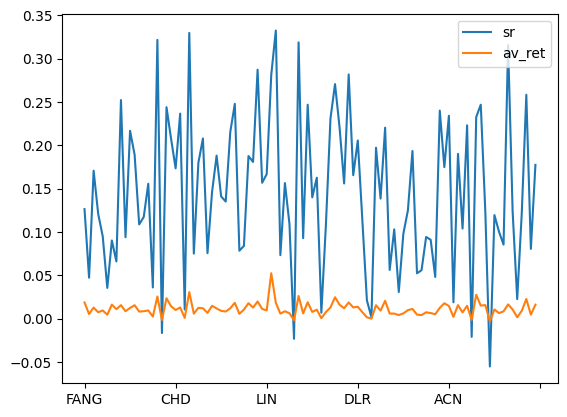

In [37]:
df_stats_tst.loc[tst].plot()

In [38]:
import random

random.shuffle(tst)
stcks = {'stocks_dict':list(tst), 'groups':{}}

for i in range(0,max_stocks,basket_size):
    stcks['groups'].update({i:list(tst[i:i+basket_size])})

In [41]:
with open('../../../datasharing/stock_tst_group.json','w') as file:
    file.write(json.dumps(stcks))